In [23]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [24]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [25]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [26]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [27]:
# reflect an existing database into a new model
autobase= automap_base()
# reflect the tables
autobase.prepare(engine, reflect=True)

In [28]:
# View all of the classes that automap found
autobase.classes.keys()

['measurement', 'station']

In [29]:
# Save references to each table
measurement=autobase.classes.measurement
station=autobase.classes.station

In [30]:
# Create our session (link) from Python to the DB
session= Session(engine)

# Exploratory Precipitation Analysis

In [31]:
# Find the most recent date in the data set.
recent_date= session.query(func.max(measurement.date)).first()
recent_date

('2017-08-23',)

Text(0.5, 0, 'Date')

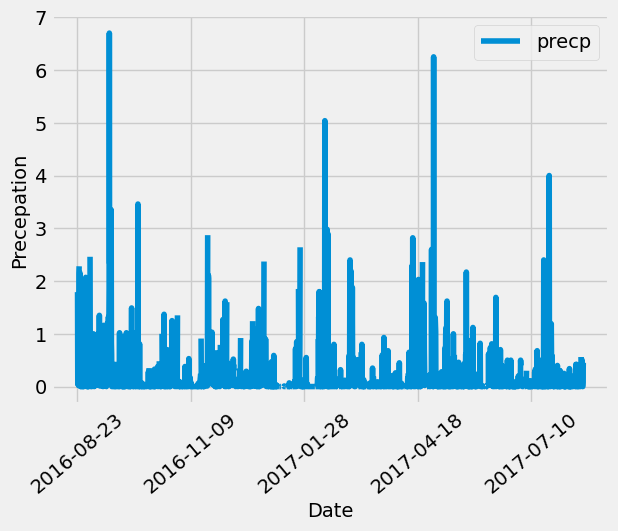

In [32]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
pre_year= dt.date(2017,8,23)- dt.timedelta(days=365)
pre_year
# Perform a query to retrieve the data and precipitation scores
results=session.query(measurement.date, measurement.prcp).filter(measurement.date >= pre_year).all()
results
# Save the query results as a Pandas DataFrame. Explicitly set the column names
df=pd.DataFrame(results,columns=["date","precp"])
df
# Sort the dataframe by date
df=df.sort_values("date")

# Use Pandas Plotting with Matplotlib to plot the data
df.plot("date", "precp", rot=40)
plt.ylabel("Precepation")
plt.xlabel("Date")


In [33]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,precp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [35]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(station.station)).all()

[(9,)]

In [37]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

# SELECT station, COUNT(station) FROM measurement GROUP BY station ORDER BY COUNT(station) DESC

session.query(measurement.station, func.count(measurement.station)).group_by(
    measurement.station).order_by(func.count(measurement.station).desc()).all()



[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [38]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).all()

[(53.0, 87.0, 73.09795396419437)]

Text(0.5, 4.183333333333314, 'Temperature')

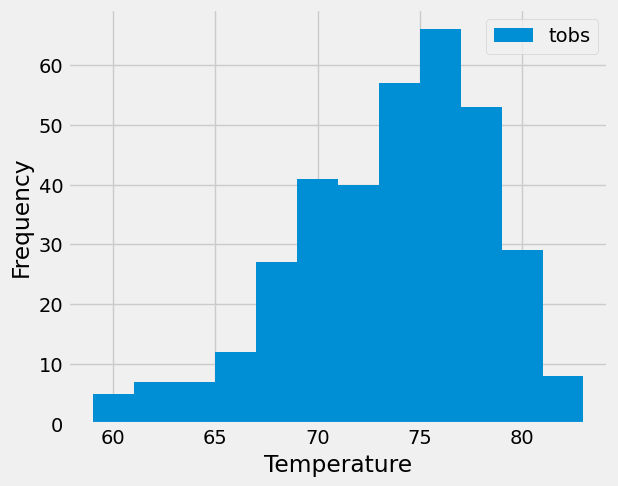

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()